X shape: (100, 1)
y shape: (100,)


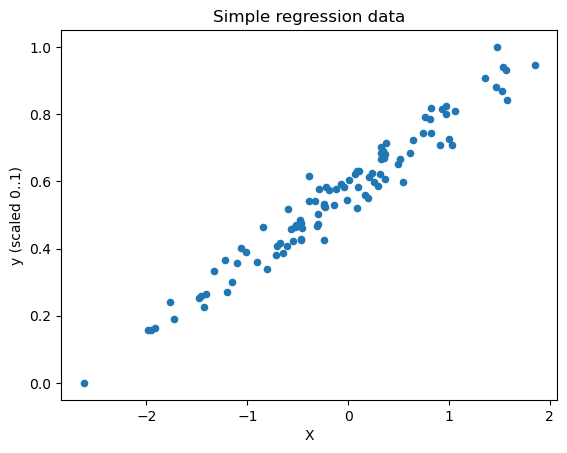

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# reproducibility
np.random.seed(42)

# simple regression data: 100 samples, 1 input feature
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# scale targets to [0,1] cuz of sigmoid output
y = (y - y.min()) / (y.max() - y.min())

print("X shape:", X.shape)   
print("y shape:", y.shape)   

# quick look
plt.scatter(X, y, s=20)
plt.xlabel("X")
plt.ylabel("y (scaled 0..1)")
plt.title("Simple regression data")
plt.show()


In [70]:
    # sigmoid activation
def sigmoid(z):
     return 1 / (1 + np.exp(-z))

# derivative of sigmoid wrt its output
def sigmoid_derivative(a):
     return a * (1 - a)


In [71]:
# initialize weights
np.random.seed(42)  # reproducibility

W1 = np.random.randn(1, 3)   # input → hidden
b1 = np.zeros((1, 3))
W2 = np.random.randn(3, 1)   # hidden → output
b2 = np.zeros((1, 1))

print("W1 shape:", W1.shape)
print("b1 shape:", b1.shape)
print("W2 shape:", W2.shape)
print("b2 shape:", b2.shape)


W1 shape: (1, 3)
b1 shape: (1, 3)
W2 shape: (3, 1)
b2 shape: (1, 1)


In [ ]:
# forward propagation
Z1 = X @ W1 + b1      
A1 = sigmoid(Z1)      # hidden layer activations
Z2 = A1 @ W2 + b2     
A2 = sigmoid(Z2)      # final output (predictions)

print("A1 shape:", A1.shape) 
print("A2 shape:", A2.shape)  
print("First 5 predictions:", A2[:5].ravel())


A1 shape: (100, 3)
A2 shape: (100, 1)
First 5 predictions: [0.66232647 0.63209978 0.58949096 0.64045799 0.61095189]


In [ ]:
# calc loss (MSE)
loss = np.mean((A2 - y.reshape(-1,1))**2)
print("Initial Loss:", loss)


Initial Loss: 0.03297896493633954


In [74]:
# backward propagation
m = y.shape[0]  # number of samples

# output layer
dA2 = 2 * (A2 - y.reshape(-1,1)) / m
dZ2 = dA2 * sigmoid_derivative(A2)
dW2 = A1.T @ dZ2
db2 = np.sum(dZ2, axis=0, keepdims=True)

# hidden layer
dA1 = dZ2 @ W2.T
dZ1 = dA1 * sigmoid_derivative(A1)
dW1 = X.T @ dZ1
db1 = np.sum(dZ1, axis=0, keepdims=True)

print("dW1 shape:", dW1.shape)
print("dW2 shape:", dW2.shape)


dW1 shape: (1, 3)
dW2 shape: (3, 1)


In [75]:
# learning rate
lr = 0.1  

# update weights and biases
W1 -= lr * dW1
b1 -= lr * db1
W2 -= lr * dW2
b2 -= lr * db2

print("Updated W1:", W1)
print("Updated W2:", W2)


Updated W1: [[ 0.49911278 -0.13868499  0.64735147]]
Updated W2: [[ 1.52209865]
 [-0.23619547]
 [-0.23484045]]


Epoch 0, Loss: 0.0327
Epoch 100, Loss: 0.0224
Epoch 200, Loss: 0.0178
Epoch 300, Loss: 0.0144
Epoch 400, Loss: 0.0118
Epoch 500, Loss: 0.0098
Epoch 600, Loss: 0.0082
Epoch 700, Loss: 0.0071
Epoch 800, Loss: 0.0062
Epoch 900, Loss: 0.0055


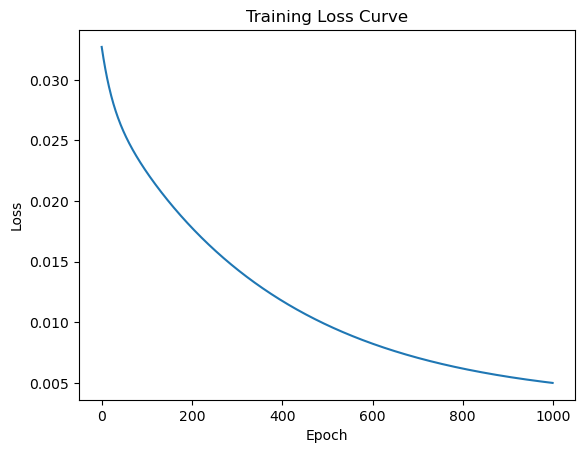

In [ ]:
# training parameters
lr = 0.1
epochs = 1000
losses = []

for epoch in range(epochs):
    # forward 
    Z1 = X @ W1 + b1
    A1 = sigmoid(Z1)
    Z2 = A1 @ W2 + b2
    A2 = sigmoid(Z2)

    #loss 
    loss = np.mean((A2 - y.reshape(-1,1))**2)
    losses.append(loss)

    # backward
    m = y.shape[0]
    dA2 = 2 * (A2 - y.reshape(-1,1)) / m
    dZ2 = dA2 * sigmoid_derivative(A2)
    dW2 = A1.T @ dZ2
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = dZ2 @ W2.T
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = X.T @ dZ1
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # ---- update ----
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

    # showing of the progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# plot loss curve
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()


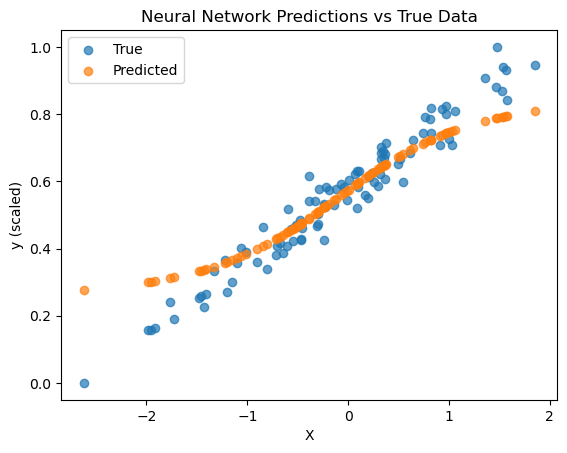

In [ ]:
# forward passing with trained weights
Z1 = X @ W1 + b1
A1 = sigmoid(Z1)
Z2 = A1 @ W2 + b2
y_pred = sigmoid(Z2)   # final predictions

# plot predictions vs true values
plt.scatter(X, y, label="True", alpha=0.7)
plt.scatter(X, y_pred, label="Predicted", alpha=0.7)
plt.xlabel("X")
plt.ylabel("y (scaled)")
plt.title("Neural Network Predictions vs True Data")
plt.legend()
plt.show()
